## Eventuella avvikelser – något oväntat mönster som sticker ut?
Analys av daglig intäkt och markerar dagar som avviker tydligt från normalnivån med hjälp av z-poäng.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("data/ecommerce_sales.csv")

df["date"] = pd.to_datetime(df["date"], errors="coerce")

# daglig intäkt
daily_revenue = (
    df.set_index("date")
      .sort_index()["revenue"]
      .resample("D")
      .sum()
)

print("Antal dagar som analyseras:", daily_revenue.shape[0])

Antal dagar som analyseras: 182


In [3]:
def compute_z_scores(series):
    """
    Räknar ut z-värden, alltså hur långt varje värde är från medelvärdet.
    Om alla värden är lika blir resultatet nollor.
    """
    mean = series.mean()
    std = series.std(ddof=0)
    if std == 0:
        return series * 0
    return (series - mean) / std

def detect_anomalies(series, threshold=3.0):
    """
    Returnerar en serie värden där z-värdet är större än gränsen.
    """
    z = compute_z_scores(series)
    mask = z.abs() >= threshold
    return series[mask], z

Antal dagar som avviker mer än 3.0 standardavvikelser: 2


date
2024-02-26    45538.28
2024-04-09    39530.14
Name: revenue, dtype: float64

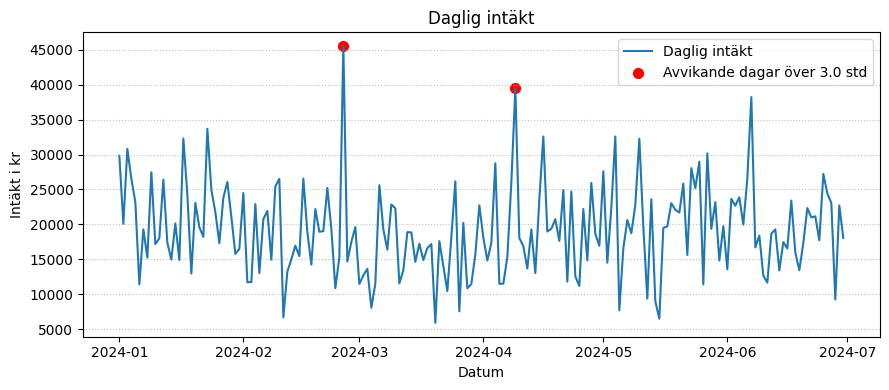

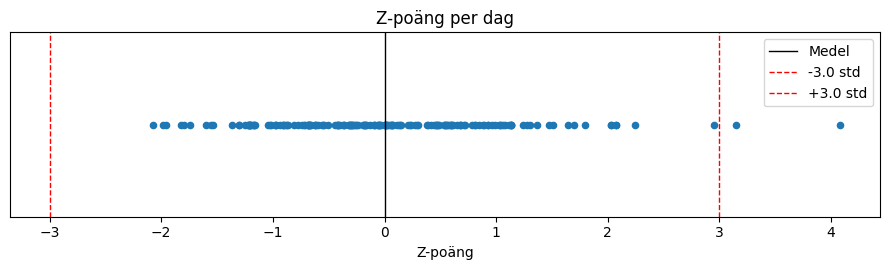

In [4]:
Z = 3.0

anomalies, z = detect_anomalies(daily_revenue, threshold=Z)

print(f"Antal dagar som avviker mer än {Z} standardavvikelser: {len(anomalies)}")

display(anomalies.sort_index().head(5))


plt.figure(figsize=(9,4))
plt.plot(daily_revenue.index, daily_revenue.values, label="Daglig intäkt")
if len(anomalies) > 0:
    plt.scatter(
        anomalies.index, anomalies.values, 
        color="red", s=50, 
        label=f"Avvikande dagar över {Z} std",
        )
plt.title("Daglig intäkt")
plt.xlabel("Datum")
plt.ylabel("Intäkt i kr")
plt.legend(loc="upper right")
plt.grid(True, axis="y", linestyle=":", alpha=0.8)
plt.tight_layout()
plt.show()



plt.figure(figsize=(9,2.8))
plt.scatter(z, np.zeros_like(z), s=20)
plt.axvline(0,  color="black", linestyle="-",  linewidth=1, label="Medel")
plt.axvline(-Z, color="red",   linestyle="--", linewidth=1, label=f"-{Z} std")
plt.axvline( Z, color="red",   linestyle="--", linewidth=1, label=f"+{Z} std")
plt.yticks([])
plt.ylabel("")
plt.xlabel("Z-poäng")
plt.title("Z-poäng per dag")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()